In [2]:
import os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\parshant'

In [5]:
os.chdir('C:\\Users\\parshant\\Downloads')

In [9]:
dataset=pd.read_csv('adult.csv')

In [10]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
dataset.shape

(48842, 15)

In [12]:
dataset.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [14]:
dataset.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

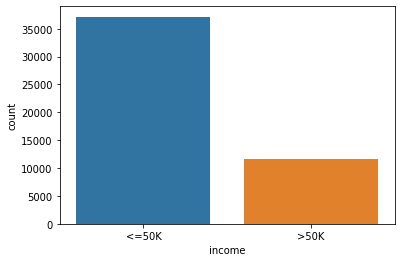

In [15]:
sb.countplot(x='income',data=dataset)

In [16]:
dataset=dataset.replace('?',np.NaN)

In [17]:
dataset.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
dataset.mode()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [20]:
data1= dataset['native-country'].mode()
dataset['native-country'] = dataset['native-country'].replace(np.NaN,data1[0])

data2 = dataset.workclass.mode()[0]
dataset.workclass = dataset.workclass.replace(np.NaN, data2)

data3= dataset.occupation.mode()[0]
dataset.occupation = dataset.occupation.replace(np.NaN,data3)

In [21]:
dataset=dataset.replace('?',np.NaN)

In [22]:
dataset.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

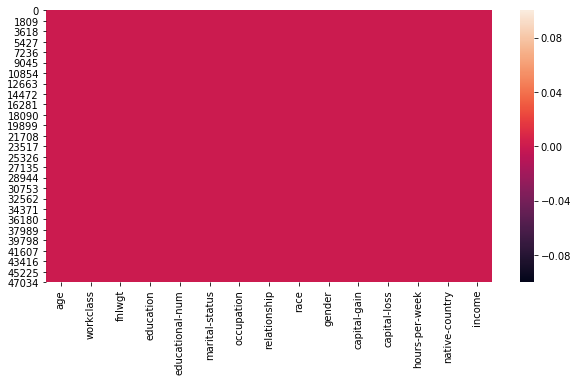

In [24]:
plt.figure(figsize=(10,5))
sb.heatmap(dataset.isnull())
plt.show()

In [25]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


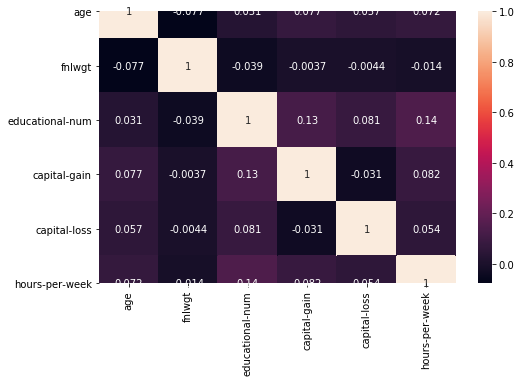

In [27]:
corr = dataset.corr()
plt.figure(figsize=(8,5))
sb.heatmap(corr, annot=True)
plt.show()

In [32]:
x=dataset.drop(['educational-num','income'],axis=1)

In [33]:
y=dataset['income']

In [35]:
dataset['income'] = dataset['income'].map({'<=50K':0, '>50K':1})

In [36]:
x=pd.get_dummies(x)

In [37]:
x.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,7688,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=200)

In [44]:
import sklearn.tree as tree

In [45]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8252235037193749

In [46]:
y_pred = clf.predict(x_test)

In [47]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8252235037193749


In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


In [49]:
cm

array([[11102,    60],
       [ 2501,   990]], dtype=int64)

In [50]:
!pip install graphviz

In [51]:
! pip install pydotplus

In [52]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

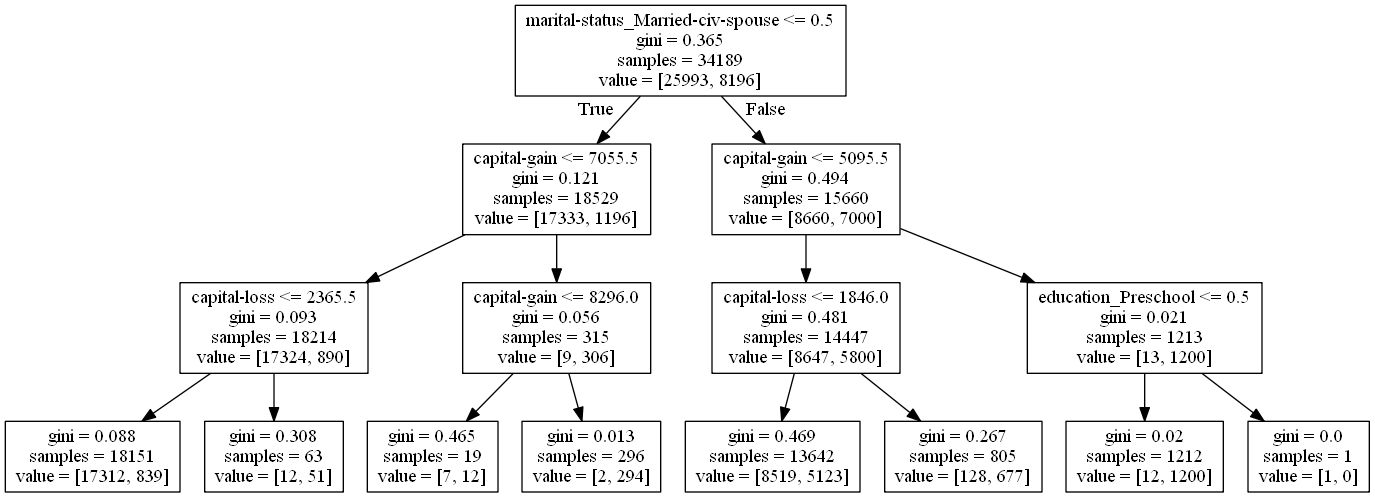

In [53]:
from IPython.display import Image  
from sklearn import tree
import pydotplus # installing pyparsing maybe needed
...

dot_data = tree.export_graphviz(clf, out_file=None, feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 3.11299973e-01, 9.60163803e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.67272214e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.92216375e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [55]:
pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False).head(5)

marital-status_Married-civ-spouse    0.592216
capital-gain                         0.311300
capital-loss                         0.096016
education_Preschool                  0.000467
native-country_Yugoslavia            0.000000
dtype: float64